## Homework Set 2 - Connor Johnson

#### Preliminary Imports

In [386]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import root
from scipy.misc import derivative
from scipy.signal import argrelextrema
import math
from math import exp
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'png'
from matplotlib import pyplot as plt

from itertools import product
from ipywidgets import interact

plt.rcParams["font.family"]='Times New Roman'
plt.rcParams["mathtext.fontset"]='stix'
# set fontsize in markdown cells
from IPython.core.display import display, HTML, Math, Latex
display(HTML("<style>.rendered_html { font-size: 16px; }</style>"))

### Problem 1

#### Part (a)

In [387]:
# Phase portrait
def phase_fxr(f,dx,r,dy,FS0,eps=1e-9,nx=100,col='r',ms=10,title='',parameter='r'):
    x = np.linspace(dx[0],dx[1],nx)
    # plot f(x;r) vs x
    fig, ax = plt.subplots(figsize=(8,5))
    ax.plot(x,f(x,r),c=col,ls='-',lw=3, label=f"$r={r}$")
    ax.set_ylim(dy)
    ax.set_xlim(dx)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$\dot{x}=f(x;$' + f"{parameter}" +'$)$')
    ax.axhline(0,dx[0],dx[-1],c='k',lw=1)
    # determine the fixed points x*
    FP = root(f,FS0,args=(r,))
    # plot x* if exist
    if FP.success:
        for x0 in FP.x:
            sFP=derivative(f,x0,dx=eps,args=(r,))
            if sFP < 0: # stable PF
                ax.plot(x0,0,'o',mfc=col,mec=col,ms=ms)
            else:
                ax.plot(x0,0,'o',mfc='w',mec=col,ms=ms)

    ax.set_title(title,color='b')
    plt.show()

# Bifurcation diagram: x vs r
def BF_diag(f,x1,x2,r1,r2,nx=80,nr=80,title='',x_lab='$r$'):
    fx = lambda x,r: derivative(f,x,dx=1e-6,args=(r,))
    x=np.linspace(x1,x2,nx)
    r=np.linspace(r1,r2,nr)
    R,X = np.meshgrid(r,x)
    Z = f(X,R)
    Zx= fx(X,R)
    Zu= np.ma.masked_where(Zx<0,Z)
    Zs= np.ma.masked_where(Zx>0,Z)
    fig, ax=plt.subplots()
    ax.contour(R,X,Zs,levels=[0],colors='k',linewidths=3)
    ax.contour(R,X,Zu,levels=[0],colors='k',linewidths=3,linestyles='dashed')
    ax.grid()
    ax.set_xlabel(x_lab)
    ax.set_ylabel('$x^\star$')
    ax.set_title(title,color='b')
    plt.show()    

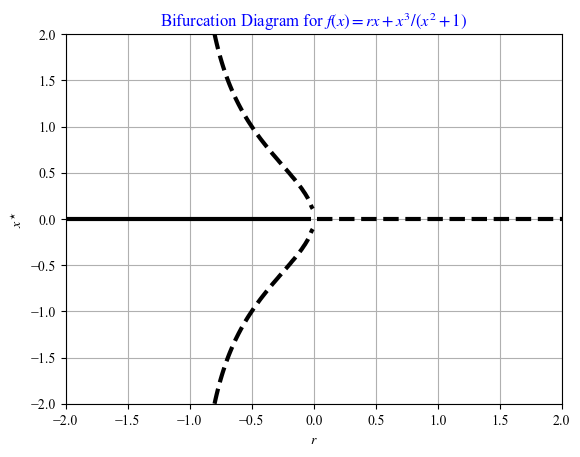

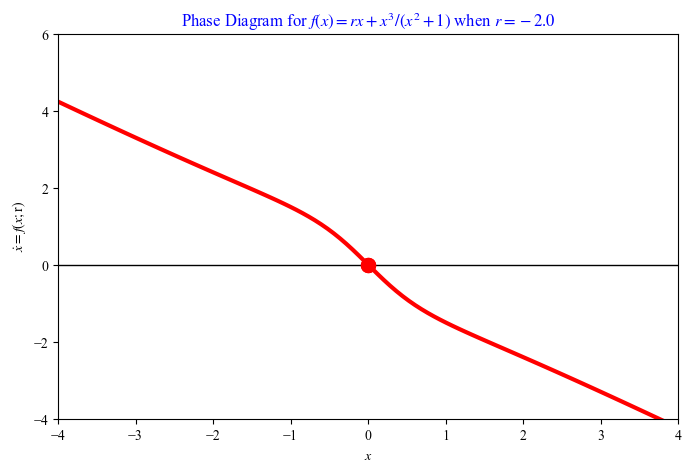

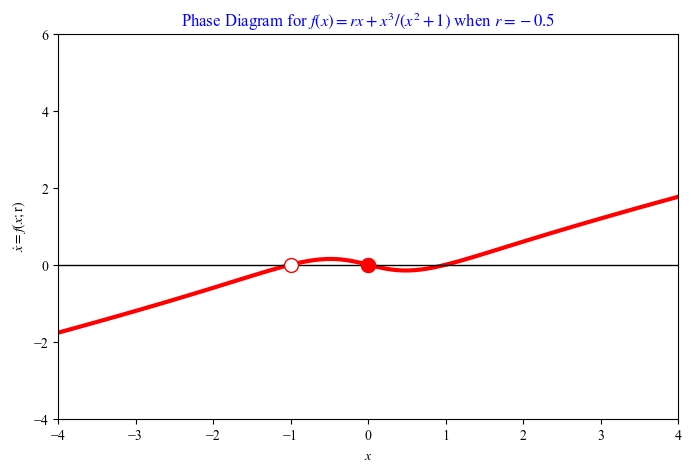

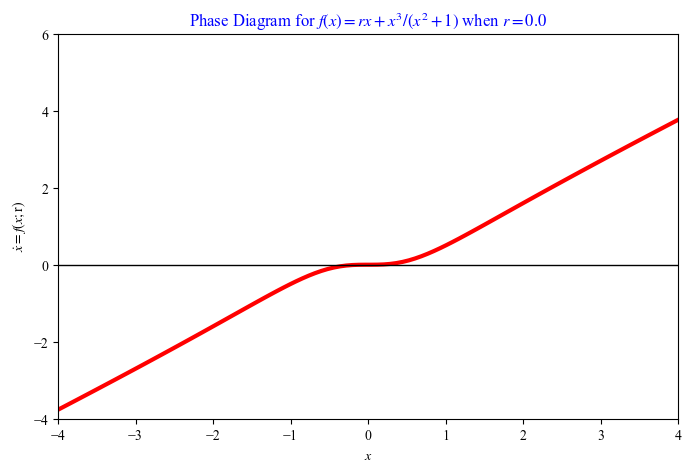

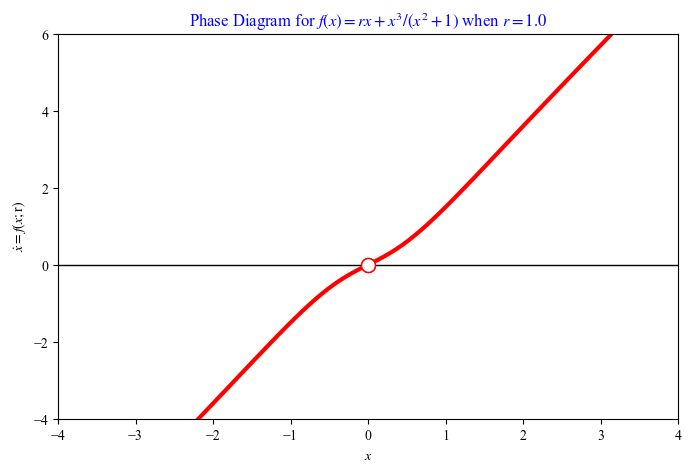

In [388]:
f = lambda x,r: r*x + (x**3)/(1+x**2)

BF_diag(f,-2,2,-2,2, title = "Bifurcation Diagram for $f(x) = rx + x^3/(x^2+1)$")

for r in [-2.0, -0.5, 0.0, 1.0]:
    dx = [-4,4]
    dy=[-4,6]
    FS0= [-1,0,0.1]
    phase_fxr(f,dx,r,dy,FS0, title = f"Phase Diagram for $f(x) = rx + x^3/(x^2+1)$ when $r={r}$")

#### Part (b)

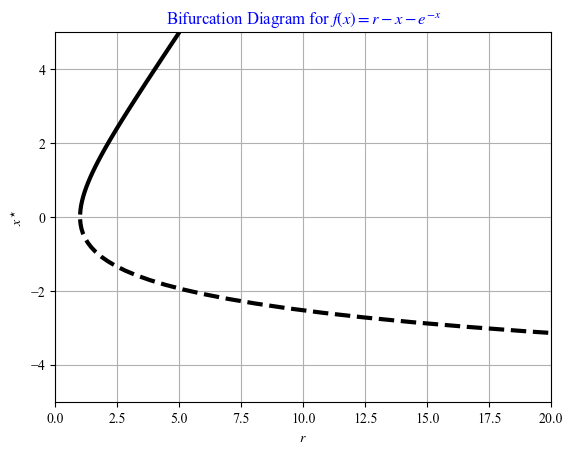

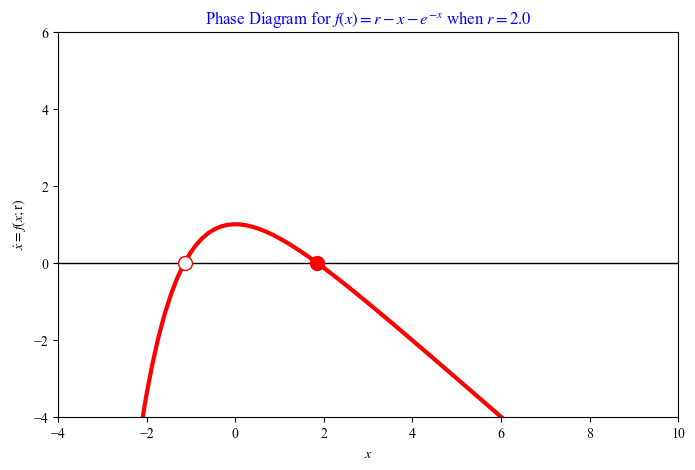

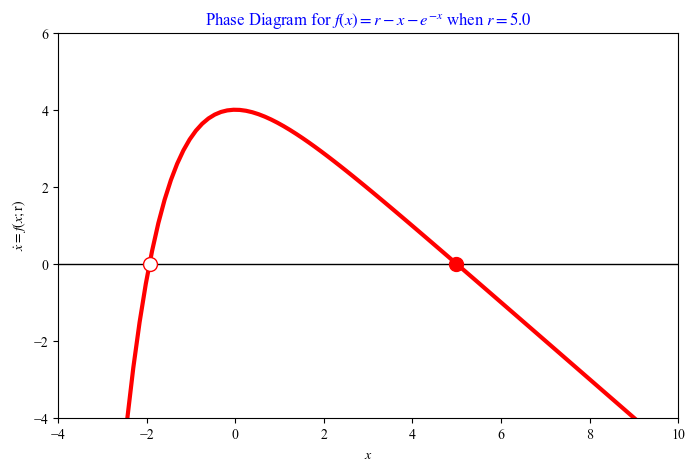

In [389]:
f = lambda x,r: r - x - np.exp(-x)

BF_diag(f,-5,5,0,20, title = "Bifurcation Diagram for $f(x) = r-x-e^{-x}$")

for r in [2.0, 5.0]:
    dx = [-4,10]
    dy=[-4,6]
    FS0= [-5,5]
    phase_fxr(f,dx,r,dy,FS0, title = "Phase Diagram for $f(x) = r-x-e^{-x}$" + f" when $r={r}$")
    

### Problem 2

#### Part (a)

Solving for $N$ from the 2nd equation:
$\\ \dot{N} = -GnN - fN + p$
$\\ 0 = -GnN - fN + p$
$\\ N(Gn + f) = p$
$\\ N(t) = \frac{p}{Gn(t) + f}$

Solving for $\dot{n}$ from the 1st equation:
$\\ \dot{n} = GnN - kn$
$\\ \dot{n} = Gn(\frac{p}{Gn + f}) - kn$
$\\ \dot{n} = \frac{pGn}{Gn + f} - kn$

This is the first order system for $n$

#### Part (b)

Dimensionless Variables for $\dot{n} = \frac{pGn}{Gn + f} - kn$:
<ul>
<li>Photons x = (G/f)n</li>
<li>Time T = kt</li>
<li>Parameter a = (PG/kf)</li>
</ul>

Dimensionless Equation: $\dot{x}\equiv\frac{dx}{dT} = f(x;a) = -x(1-\frac{a}{x+1})$


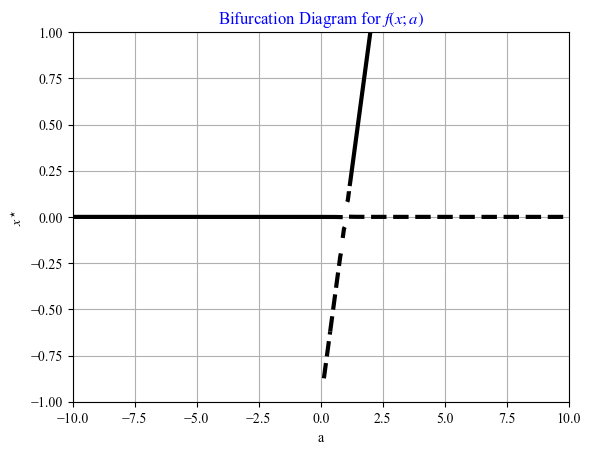

In [390]:
f = lambda x, a : -x*(1-a/(x+1))
BF_diag(f,-1,1,-10,10, title = "Bifurcation Diagram for $f(x;a)$", x_lab='a')


When $n^*=0$, $x^*=0$. At $x^*=0$, the bifurcation graph shows that when $a$ is about equal to 1, the stability changes.

In [391]:
#Seeing where df/dT switches signs
dx = 0.000000000001
f = lambda x: -x*(1-(0.5)/(x+1))
prev_diff = derivative(f,0,dx=dx)

for a in np.arange(0.5, 1.5, 0.0001):
    f = lambda x: -x*(1-a/(x+1))
    if( derivative(f,0,dx=dx)<0 and prev_diff>=0 or derivative(f,0,dx=dx)>0 and prev_diff<=0):
        print(f"At a = {round(a,3)}, f(x) switches signs")
    prev_diff = derivative(f,0, dx=dx)

At a = 1.0, f(x) switches signs


When $a=1$, stability switches to being unstable. Since $a=\frac{pG}{kf}$, stability becomes unstable at $n^*=0$ when $p>\frac{kf}{G}$ ($p_c$ can be equal to be $\frac{kf}{G}$).

#### Part (c)

Based on the bifurcation graph above, at $a=p_c$, transcritical bifurcation happens since stability is exchanged between the line $x^*=0$ and the line with the positive slope at that point.

#### Part (d)

The assumtion from (a) works if $a=\frac{pG}{kf}<1$. This is because when $a<1$, the system is most stable at $n=0$. This reflects how the laser would actually work; over time, less photons will be ejected until no more photons can be ejected. When $a>1$, the assumtion implies that the system will converge to a $n$ value that is greater than zero. This doesn't make sense physically as the laser has to die out over time.

### Problem 3

#### Part (a)

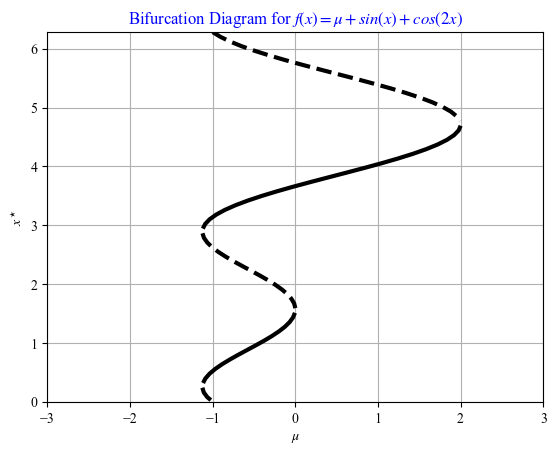

In [392]:
f = lambda theta, mu: mu + np.sin(theta) + np.cos(2*theta)

BF_diag(f,0,2*math.pi,-3,3, title = "Bifurcation Diagram for $f(x) = \mu+sin(x)+cos(2x)$", x_lab = "$\mu$")

When $\dot{\theta}=0$, $\mu = -(sin(\theta)+cos(2\theta))$. Based on the bifurcation diagram, those local extrema are where the bifurcation points are.

In [393]:
mu = lambda theta : -(np.sin(theta) + np.cos(2*theta))
arr = mu(np.arange(0, 2*math.pi, 0.001)) 

#Find local maxima
local_max = argrelextrema(arr,np.greater)
for i in local_max[0]:
    print(f"Local Max: mu={round(arr[i],2)}")

#Finding local minima
local_min = argrelextrema(arr,np.less)
for i in local_min[0]:
    print(f"Local Min: mu={round(arr[i],2)}")

Local Max: mu=-0.0
Local Max: mu=2.0
Local Min: mu=-1.12
Local Min: mu=-1.12


All points of bifurcation are saddle-node bifurcations. Bifurcation happens when $\mu=0,2,-1.12$.

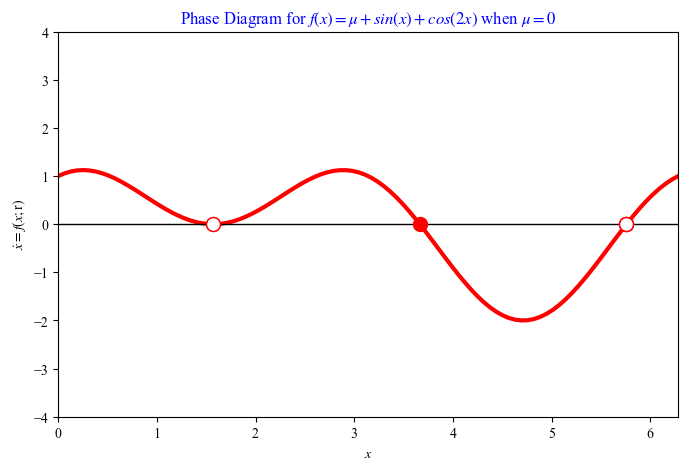

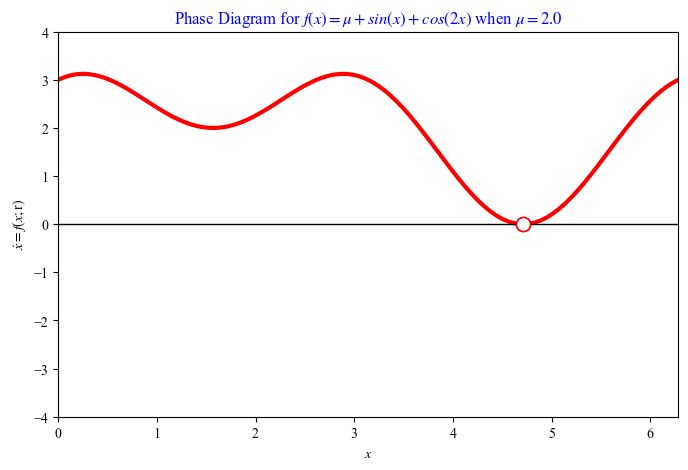

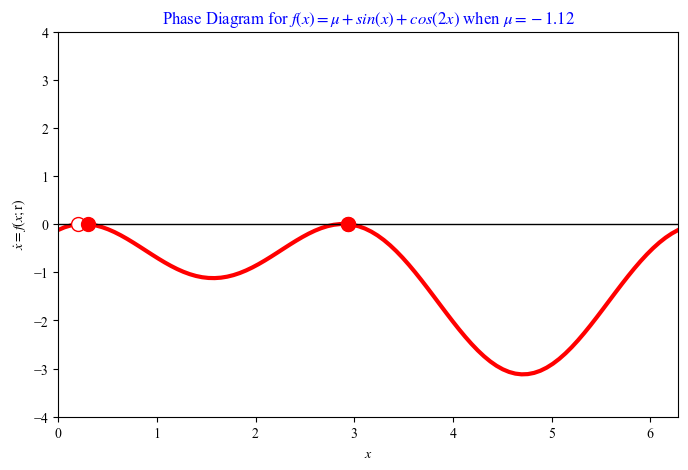

In [394]:
for mu in [0, 2.0, -1.12]:
    dx = [0,2*math.pi]
    dy=[-4,4]
    FS0= [-0.1,1,1.5,3,3.6,5,5.5,6]
    phase_fxr(f,dx,mu,dy,FS0, title = f"Phase Diagram for $f(x) = \mu+sin(x)+cos(2x)$ when $\mu={mu}$")

#### Part (b)

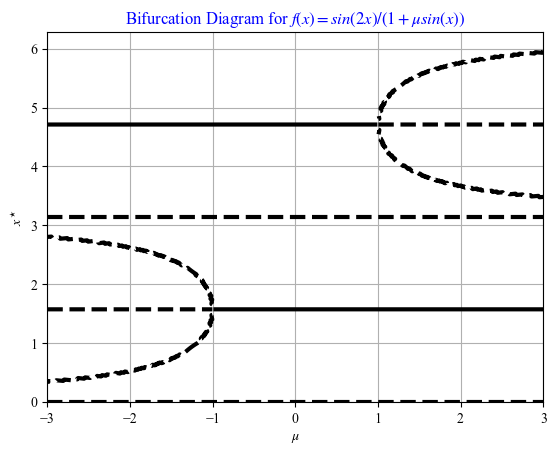

In [395]:
f = lambda theta, mu: np.sin(2*theta)/(1+mu*np.sin(theta))
BF_diag(f,0,2*math.pi,-3,3, title = "Bifurcation Diagram for $f(x) = sin(2x)/(1+\mu sin(x))$", x_lab = "$\mu$", nx= 500, nr=500)

At fixed points $\theta^*=\frac{\pi}{2},\frac{3\pi}{2}$, there ae two pitchfork bifurcations that are neither supercritical or subcritical. Based on the bifurcation graph, the bifurcations occur at $\mu=\pm1$

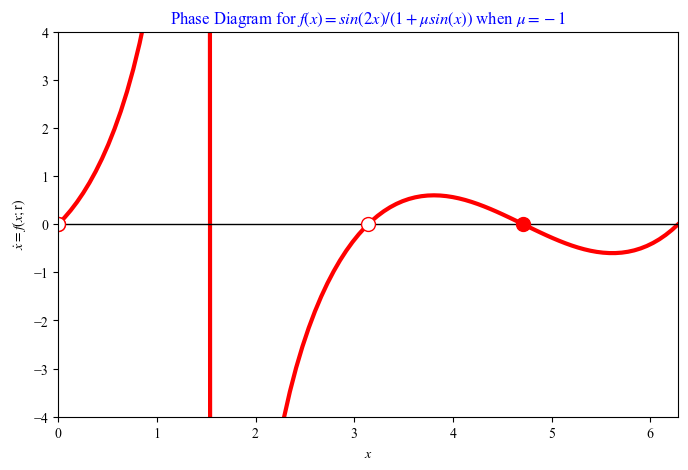

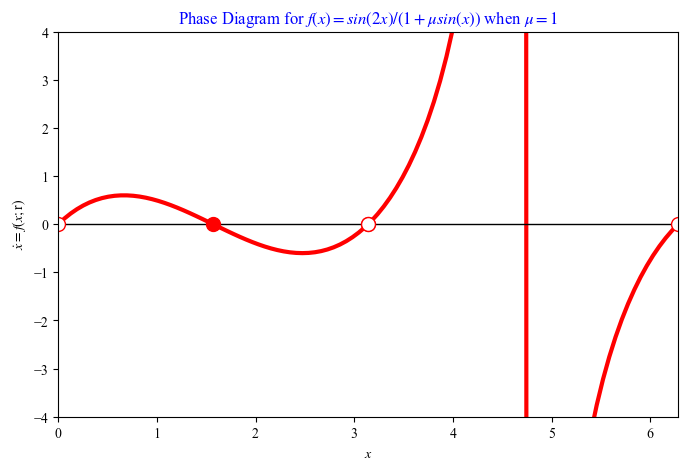

In [396]:
for mu in [-1, 1]:
    dx = [0,2*math.pi]
    dy=[-4,4]
    FS0= [0,1.5, 3.2, 4.6, 6]
    phase_fxr(f,dx,mu,dy,FS0, title = f"Phase Diagram for $f(x) = sin(2x)/(1+\mu sin(x))$ when $\mu={mu}$")

### Problem 4

#### Part (a)

Let $\mu=\frac{I}{I_c}$. This would mean that $\dot{\theta}=\mu - sin(\theta)$.

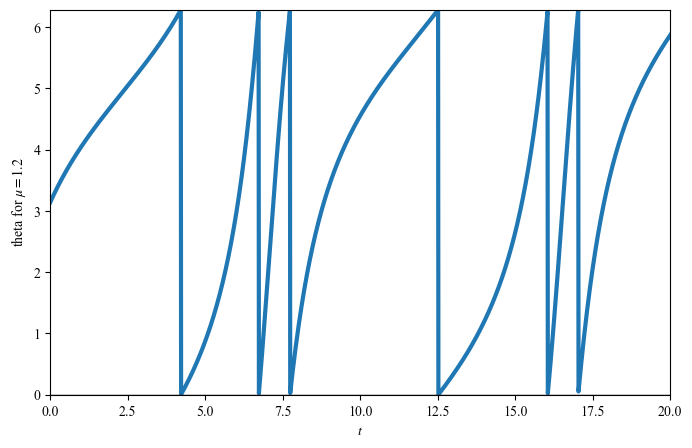

In [397]:
# solve numerically for theta
def theta_ode(theta,t, mu):
    return mu - np.sin(theta)
def integrate_theta_ode(t_max,dt,theta_0, mu):
    t = np.arange(0,t_max+dt,dt)
    x0 = [theta_0]
    sol = odeint(theta_ode,x0,t, args=(mu,))
    return [t, sol.T[0]]

t_arr, theta_arr = integrate_theta_ode(20, 0.01, 1, 1.2) #one radian as the initial value
reduced_theta_arr = [theta_arr[i]%2*math.pi for i in range(len(theta_arr))]
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(t_arr, reduced_theta_arr,ls='-',lw=3)
ax.set_ylim(0, 2*math.pi)
ax.set_xlim(0, 20)
ax.set_xlabel('$t$')
ax.set_ylabel('theta for $\mu = 1.2$')
ax.axhline(0,dx[0],dx[-1],c='k',lw=1)
plt.show()

Since $\theta(t)$ can be solved, the supercurrent in the form $\frac{I_s}{I_c} = sin(\theta(t))$ can also be graphed.

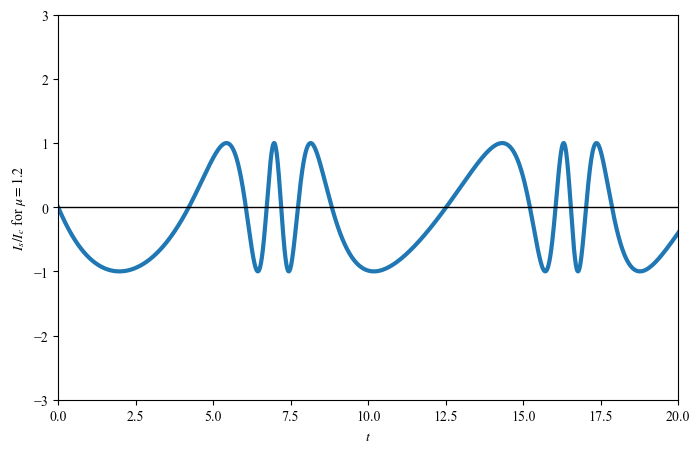

In [398]:
super_current = lambda theta : np.sin(theta)

sc_arr = [super_current(theta) for theta in reduced_theta_arr]
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(t_arr, sc_arr,ls='-',lw=3)
ax.set_ylim(-3, 3)
ax.set_xlim(0, 20)
ax.set_xlabel('$t$')
ax.set_ylabel('$I_s/I_c$ for $\mu = 1.2$')
ax.axhline(0,dx[0],dx[-1],c='k',lw=1)
plt.show()

For $\mu=10>>1$:

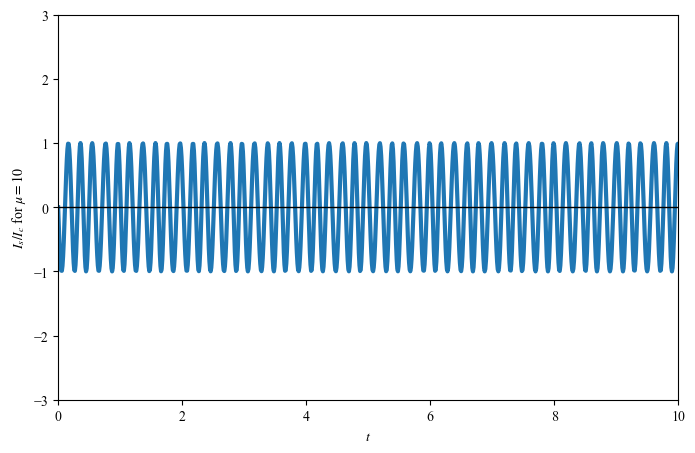

In [399]:
t_arr, theta_arr = integrate_theta_ode(20, 0.01, 1, 10) #one radian as the initial value
reduced_theta_arr = [theta_arr[i]%2*math.pi for i in range(len(theta_arr))]
sc_arr = [super_current(theta) for theta in reduced_theta_arr]
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(t_arr, sc_arr,ls='-',lw=3)
ax.set_ylim(-3, 3)
ax.set_xlim(0, 10)
ax.set_xlabel('$t$')
ax.set_ylabel('$I_s/I_c$ for $\mu = 10$')
ax.axhline(0,dx[0],dx[-1],c='k',lw=1)
plt.show()

#### Part (b)

$V = \frac{\hbar}{2e}\dot{\theta} = \frac{\hbar}{2e}(\mu - sin(\theta))$. For $\mu = 1.2>1$:

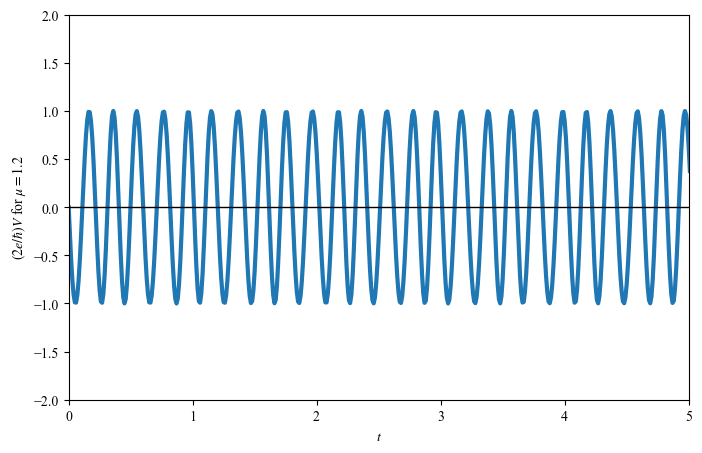

In [400]:
reduced_voltage = lambda theta, mu: mu - np.sin(theta)

t_arr, theta_arr = integrate_theta_ode(20, 0.01, 1, 1.2) #one radian as the initial value
reduced_theta_arr = [theta_arr[i]%2*math.pi for i in range(len(theta_arr))]
v_arr= [reduced_voltage(theta, 1.2) for theta in reduced_theta_arr]
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(t_arr, sc_arr,ls='-',lw=3)
ax.set_ylim(-2, 2)
ax.set_xlim(0, 5)
ax.set_xlabel('$t$')
ax.set_ylabel('$(2e/\hbar)V$ for $\mu = 1.2$')
ax.axhline(0,dx[0],dx[-1],c='k',lw=1)
plt.show()

For $\mu=10>>1$:

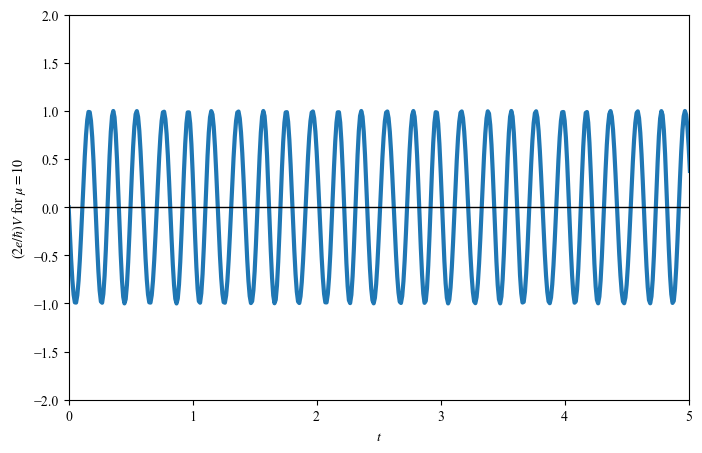

In [401]:
t_arr, theta_arr = integrate_theta_ode(20, 0.01, 1, 10) #one radian as the initial value
reduced_theta_arr = [theta_arr[i]%2*math.pi for i in range(len(theta_arr))]
v_arr= [reduced_voltage(theta, 10) for theta in reduced_theta_arr]
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(t_arr, sc_arr,ls='-',lw=3)
ax.set_ylim(-2, 2)
ax.set_xlim(0, 5)
ax.set_xlabel('$t$')
ax.set_ylabel('$(2e/\hbar)V$ for $\mu = 10$')
ax.axhline(0,dx[0],dx[-1],c='k',lw=1)
plt.show()